In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [55]:
fontsize_xylabel = 13
fontsize_tick = 13

def stats_test(*data):

    #shapiro
    print('All:', stats.shapiro(data))
    for i in np.arange(0, len(data)):
        _, b = stats.shapiro(data[i])
        print('p-value', b)

    #kruskal
    k = stats.kruskal(*data)
    print(k)

    # anova test
    anova = stats.f_oneway(*data)
    print(anova)

    # tukey test
    a = []
    s = []
    for d in np.arange(0, len(data)):
        a = a + data[d]
        s.append('scenario ' + str(d+1))

    df = pd.DataFrame({'score': a,
                       'group': np.repeat(s, repeats=len(data[0]))})

    tukey = pairwise_tukeyhsd(endog=df['score'],
                              groups=df['group'],
                              alpha=0.05)

    print(tukey)

    rows = tukey.summary().data[1:]
    plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
    plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
    plt.gca().set_yticks( range( len( rows ) ) )
    plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
    plt.show()
    #Confidence intervals that cross the vertical, dashed line at  are those in which the means across those groups may be equal.

# Clusterer

## DBSCAN > Boxplot

All: ShapiroResult(statistic=0.9332916140556335, pvalue=0.00737743079662323)
p-value 0.2244313508272171
p-value 0.08296076953411102
p-value 0.17729423940181732
p-value 0.11407613009214401
p-value 0.9571326375007629
KruskalResult(statistic=36.94364099360975, pvalue=1.8501069936572374e-07)
F_onewayResult(statistic=44.3115477367872, pvalue=4.687987392729361e-15)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
scenario 1 scenario 2   0.0285  0.519  -0.023   0.08  False
scenario 1 scenario 3   0.0026    0.9 -0.0489 0.0541  False
scenario 1 scenario 4   0.1795  0.001   0.128  0.231   True
scenario 1 scenario 5    0.147  0.001  0.0955 0.1985   True
scenario 2 scenario 3  -0.0259 0.5986 -0.0774 0.0256  False
scenario 2 scenario 4    0.151  0.001  0.0995 0.2025   True
scenario 2 scenario 5   0.1185  0.001   0.067   0.17   True
scenario 3 scenario 4   0.1769  0.001 

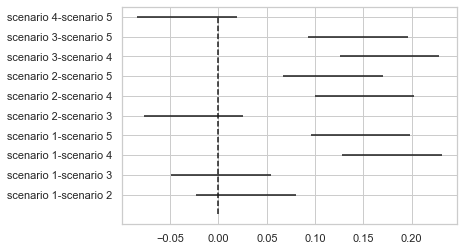

All: ShapiroResult(statistic=0.6713283061981201, pvalue=2.6208926140469657e-09)
p-value 0.14689259231090546
p-value 4.1375557202627533e-07
p-value 0.22417104244232178
p-value 0.0779680609703064
p-value 0.08186100423336029
KruskalResult(statistic=40.40293481915557, pvalue=3.572564663793223e-08)
F_onewayResult(statistic=147.17533040487322, pvalue=3.128717749566317e-25)
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
scenario 1 scenario 2   -2.408  0.399  -6.2523   1.4363  False
scenario 1 scenario 3  -22.465  0.001 -26.3093 -18.6207   True
scenario 1 scenario 4    0.295    0.9  -3.5493   4.1393  False
scenario 1 scenario 5  -21.111  0.001 -24.9553 -17.2667   True
scenario 2 scenario 3  -20.057  0.001 -23.9013 -16.2127   True
scenario 2 scenario 4    2.703 0.2837  -1.1413   6.5473  False
scenario 2 scenario 5  -18.703  0.001 -22.5473 -14.8587   True


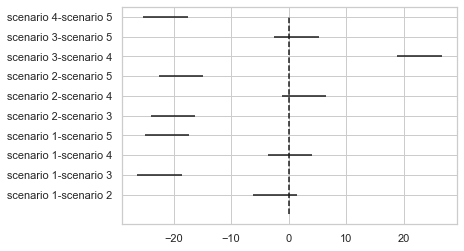

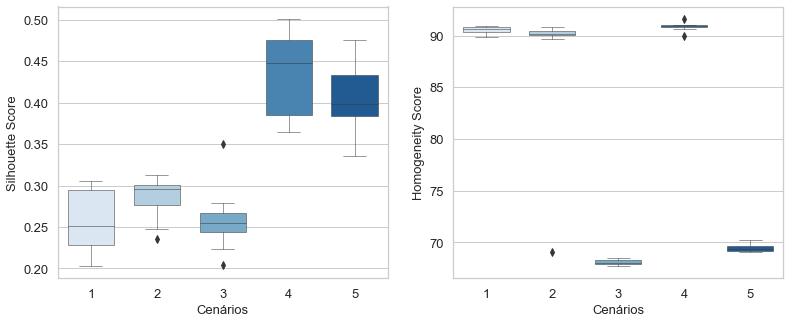

In [56]:
columns = ['1','2','3','4','5']

silhoutte = [
    [0.288,0.244,0.205,0.258,0.306,0.233,0.203,0.297,0.302,0.226],
    [0.284,0.236,0.274,0.297,0.248,0.302,0.294,0.302,0.297,0.313],
    [0.204,0.250,0.279,0.267,0.246,0.267,0.259,0.243,0.223,0.350],
    [0.364,0.364,0.460,0.466,0.432,0.370,0.486,0.479,0.501,0.435],
    [0.440,0.443,0.398,0.398,0.476,0.384,0.384,0.412,0.335,0.362]
]

homogeneity = [
    [90.79,90.78,90.44,90.86,89.86,90.33,90.92,90.83,90.36,90.53],
    [90.05,90.84,90.01,90.85,69.05,90.06,90.49,90.44,89.63,90.20],
    [67.73,68.14,68.47,67.93,68.39,67.95,68.44,67.97,67.98,68.05],
    [90.84,90.92,91.61,90.62,90.93,90.79,89.94,90.98,91.01,91.01],
    [69.03,69.18,70.07,70.19,69.32,69.37,69.22,69.80,69.04,69.37]
]

stats_test(silhoutte[0],silhoutte[1],silhoutte[2],silhoutte[3],silhoutte[4])
stats_test(homogeneity[0],homogeneity[1],homogeneity[2],homogeneity[3],homogeneity[4])

fig, axs = plt.subplots(ncols=2, figsize=(13,5))
sns.set_style("whitegrid")

ax = sns.boxplot(data=silhoutte, palette='Blues', ax=axs[0], width=.7, linewidth = 0.5)
ax.set_xlabel("Cenários",fontsize=fontsize_xylabel)
ax.set_ylabel("Silhouette Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
a = ax.set_xticklabels(columns, rotation=0)

ax = sns.boxplot(data=homogeneity, palette='Blues', ax=axs[1],  width=.7, linewidth = 0.5)
ax.set_xlabel("Cenários",fontsize=fontsize_xylabel)
ax.set_ylabel("Homogeneity Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
_ = ax.set_xticklabels(columns, rotation=0)

fig = ax.get_figure()
fig.savefig("6_cluster_dbscan_silhouette_homogeneity_boxplot.pdf", bbox_inches='tight')

## Agglomerative Clustering

All: ShapiroResult(statistic=0.9694320559501648, pvalue=0.219442218542099)
p-value 0.9890255331993103
p-value 0.5384988784790039
p-value 0.019198574125766754
p-value 0.13228881359100342
p-value 0.257257878780365
KruskalResult(statistic=22.555294117647037, pvalue=0.00015534427702290662)
F_onewayResult(statistic=11.160502372015229, pvalue=2.2506672666127703e-06)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
scenario 1 scenario 2   0.0218  0.001  0.0104 0.0333   True
scenario 1 scenario 3   0.0111 0.0605 -0.0003 0.0226  False
scenario 1 scenario 4   0.0191  0.001  0.0077 0.0306   True
scenario 1 scenario 5   0.0226  0.001  0.0112  0.034   True
scenario 2 scenario 3  -0.0107 0.0764 -0.0221 0.0007  False
scenario 2 scenario 4  -0.0027    0.9 -0.0141 0.0088  False
scenario 2 scenario 5   0.0008    0.9 -0.0107 0.0122  False
scenario 3 scenario 4    0.008 0.2852

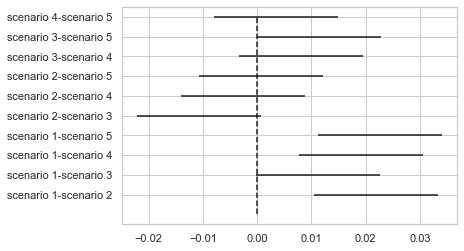

All: ShapiroResult(statistic=0.8621587753295898, pvalue=3.357790774316527e-05)
p-value 0.8073431849479675
p-value 0.03923898562788963
p-value 0.5457589030265808
p-value 0.2245909571647644
p-value 0.20890803635120392
KruskalResult(statistic=44.03878531616375, pvalue=6.297861923550588e-09)
F_onewayResult(statistic=150.17463779135772, pvalue=2.0544125473332265e-25)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
scenario 1 scenario 2    0.018    0.9 -0.3042  0.3402  False
scenario 1 scenario 3   -1.948  0.001 -2.2702 -1.6258   True
scenario 1 scenario 4    0.374 0.0156  0.0518  0.6962   True
scenario 1 scenario 5   -1.205  0.001 -1.5272 -0.8828   True
scenario 2 scenario 3   -1.966  0.001 -2.2882 -1.6438   True
scenario 2 scenario 4    0.356 0.0237  0.0338  0.6782   True
scenario 2 scenario 5   -1.223  0.001 -1.5452 -0.9008   True
scenario 3 scenario 4    

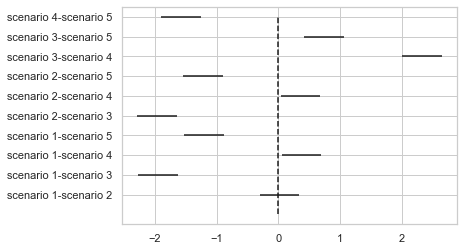

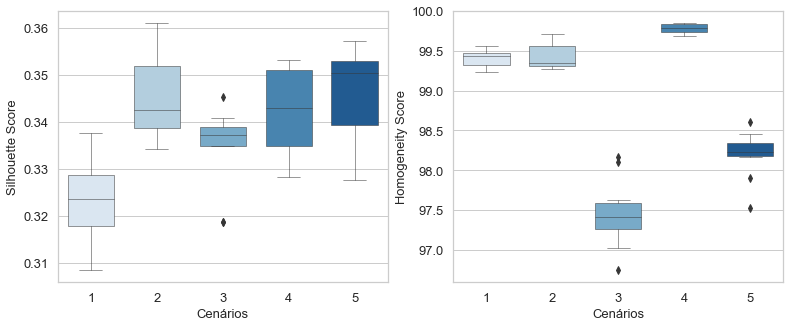

In [57]:
columns = ['1','2','3','4','5']

silhoutte = [
    [0.30852604,0.33754153,0.31561038,0.32470172,0.32863795,0.31721267,0.32870262,0.32004316,0.32258598,0.3299505],
    [0.33686211,0.35323497,0.33808529,0.35246862,0.35026356,0.33416467,0.34065012,0.36102474,0.342,0.343],
    [0.33487738,0.33908058,0.34075402,0.33682019,0.34532196,0.33794929,0.33744625,0.31880245,0.33484044,0.31877036],
    [0.3380634,0.33289058,0.33640256,0.35313751,0.35287377,0.34945179,0.32829016,0.35156587,0.34794832,0.33431882],
    [0.32760392,0.34178112,0.33507261,0.35122457,0.35341985,0.35100746,0.34967542,0.33843945,0.354,0.35727015]
]

homogeneity = [
    [99.45,99.41,99.31,99.23,99.32,99.46,99.56,99.49,99.34,99.48],
    [99.28,99.60,99.71,99.32,99.32,99.42,99.38,99.30,99.27,99.63],
    [97.38,97.63,98.11,98.17,97.22,97.38,97.03,97.45,96.75,97.45],
    [99.85,99.79,99.85,99.73,99.68,99.71,99.83,99.79,99.73,99.83],
    [97.53,98.46,98.22,98.17,98.23,98.31,98.22,98.35,97.90,98.61]
]

stats_test(silhoutte[0],silhoutte[1],silhoutte[2],silhoutte[3],silhoutte[4])
stats_test(homogeneity[0],homogeneity[1],homogeneity[2],homogeneity[3],homogeneity[4])

fig, axs = plt.subplots(ncols=2, figsize=(13,5))
sns.set_style("whitegrid")

ax = sns.boxplot(data=silhoutte, palette='Blues', ax=axs[0], width=.7, linewidth = 0.5)
ax.set_xlabel("Cenários",fontsize=fontsize_xylabel)
ax.set_ylabel("Silhouette Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
a = ax.set_xticklabels(columns, rotation=0)

ax = sns.boxplot(data=homogeneity, palette='Blues', ax=axs[1],  width=.7, linewidth = 0.5)
ax.set_xlabel("Cenários",fontsize=fontsize_xylabel)
ax.set_ylabel("Homogeneity Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
_ = ax.set_xticklabels(columns, rotation=0)

fig = ax.get_figure()
fig.savefig("6_cluster_agglomerative_silhouette_homogeneity_boxplot.pdf", bbox_inches='tight')



## KMeans

All: ShapiroResult(statistic=0.9830551147460938, pvalue=0.6858565211296082)
p-value 0.8063986897468567
p-value 0.5728908777236938
p-value 0.668084442615509
p-value 0.8172876834869385
p-value 0.495281845331192
KruskalResult(statistic=32.63058823529411, pvalue=1.4216335593411996e-06)
F_onewayResult(statistic=25.267639955452005, pvalue=5.174900517004352e-11)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
scenario 1 scenario 2   0.0203  0.001  0.0127  0.0279   True
scenario 1 scenario 3   0.0124  0.001  0.0048    0.02   True
scenario 1 scenario 4   0.0183  0.001  0.0107  0.0259   True
scenario 1 scenario 5   0.0245  0.001  0.0169  0.0321   True
scenario 2 scenario 3  -0.0079 0.0392 -0.0155 -0.0003   True
scenario 2 scenario 4  -0.0019    0.9 -0.0095  0.0057  False
scenario 2 scenario 5   0.0043 0.5099 -0.0033  0.0119  False
scenario 3 scenario 4   0.0059 0

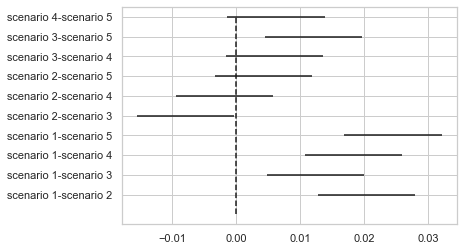

All: ShapiroResult(statistic=0.871063768863678, pvalue=6.059234874555841e-05)
p-value 0.31680265069007874
p-value 0.6327707767486572
p-value 0.6250264048576355
p-value 0.2705738842487335
p-value 0.6629086136817932
KruskalResult(statistic=44.61170141223936, pvalue=4.788032440957077e-09)
F_onewayResult(statistic=167.79439501414583, pvalue=2.0111163935475661e-26)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
scenario 1 scenario 2    0.133 0.8131 -0.2293  0.4953  False
scenario 1 scenario 3   -2.308  0.001 -2.6703 -1.9457   True
scenario 1 scenario 4    0.531 0.0013  0.1687  0.8933   True
scenario 1 scenario 5   -1.206  0.001 -1.5683 -0.8437   True
scenario 2 scenario 3   -2.441  0.001 -2.8033 -2.0787   True
scenario 2 scenario 4    0.398 0.0249  0.0357  0.7603   True
scenario 2 scenario 5   -1.339  0.001 -1.7013 -0.9767   True
scenario 3 scenario 4    2.

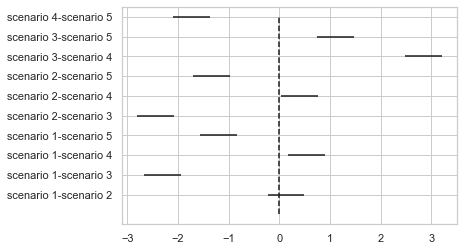

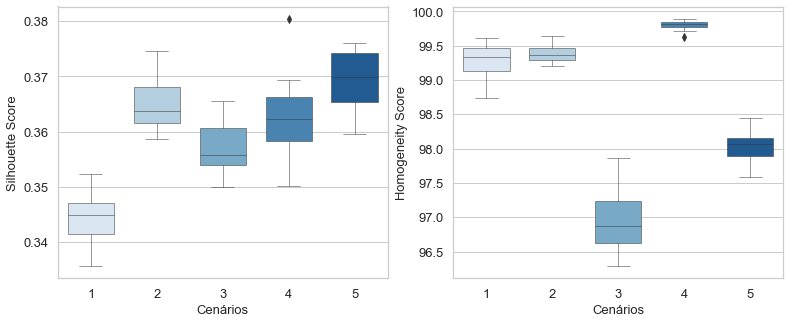

In [58]:
columns = ['1','2','3','4','5']

silhoutte = [
    [0.34726511,0.34310674,0.34689502,0.35143707,0.34688398,0.35228808,0.33570812,0.34148121,0.34177009,0.33955342],
    [0.36386379,0.36099577,0.36355513,0.36577337,0.36996875,0.35876431,0.37451987,0.36894059,0.35917357,0.36357638],
    [0.3570164,0.36162685,0.35784882,0.36564368,0.35326607,0.35376185,0.36230272,0.35435366,0.35462746,0.35000799],
    [0.35730166,0.35020225,0.38041918,0.36470781,0.36280073,0.35486649,0.36690296,0.36159208,0.36941921,0.36161899],
    [0.36270452,0.37602144,0.37147049,0.36525215,0.37247789,0.36581377,0.37484486,0.36825689,0.35950833,0.37530415]
]

homogeneity = [
    [99.61,99.21,99.39,99.28,99.44,99.48,98.83,99.53,98.73,99.11],
    [99.48,99.25,99.21,99.34,99.44,99.59,99.64,99.29,99.31,99.39],
    [96.68,96.58,97.34,96.61,97.47,96.95,96.87,96.29,96.88,97.86],
    [99.85,99.80,99.77,99.77,99.83,99.85,99.71,99.83,99.62,99.89],
    [98.44,98.11,98.42,98.16,97.58,98.03,97.90,98.14,97.88,97.89],
]

stats_test(silhoutte[0],silhoutte[1],silhoutte[2],silhoutte[3],silhoutte[4])
stats_test(homogeneity[0],homogeneity[1],homogeneity[2],homogeneity[3],homogeneity[4])

fig, axs = plt.subplots(ncols=2, figsize=(13,5))
sns.set_style("whitegrid")

ax = sns.boxplot(data=silhoutte, palette='Blues', ax=axs[0], width=.7, linewidth = 0.5)
ax.set_xlabel("Cenários",fontsize=fontsize_xylabel)
ax.set_ylabel("Silhouette Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
a = ax.set_xticklabels(columns, rotation=0)

ax = sns.boxplot(data=homogeneity, palette='Blues', ax=axs[1],  width=.7, linewidth = 0.5)
ax.set_xlabel("Cenários",fontsize=fontsize_xylabel)
ax.set_ylabel("Homogeneity Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
_ = ax.set_xticklabels(columns, rotation=0)

fig = ax.get_figure()
fig.savefig("6_cluster_kmeans_silhouette_homogeneity_boxplot.pdf", bbox_inches='tight')



## Mini Batch KMeans

All: ShapiroResult(statistic=0.9613949656486511, pvalue=0.10170408338308334)
p-value 0.8720114827156067
p-value 0.5807189345359802
p-value 0.37105390429496765
p-value 0.7961112856864929
p-value 0.6270225048065186
KruskalResult(statistic=19.12094117647058, pvalue=0.0007440868860159262)
F_onewayResult(statistic=8.997290918417571, pvalue=1.9906854224059112e-05)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
scenario 1 scenario 2   0.0044    0.9 -0.0573  0.066  False
scenario 1 scenario 3   0.0101    0.9 -0.0516 0.0718  False
scenario 1 scenario 4   0.1105  0.001  0.0488 0.1721   True
scenario 1 scenario 5   0.0228 0.8097 -0.0389 0.0845  False
scenario 2 scenario 3   0.0057    0.9 -0.0559 0.0674  False
scenario 2 scenario 4   0.1061  0.001  0.0444 0.1678   True
scenario 2 scenario 5   0.0184    0.9 -0.0433 0.0801  False
scenario 3 scenario 4   0.1004  0.001  

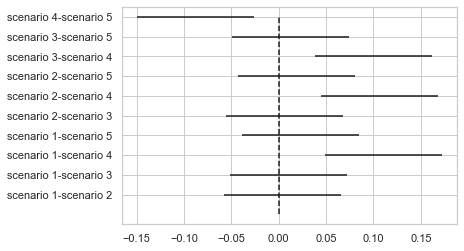

All: ShapiroResult(statistic=0.9790012836456299, pvalue=0.5106517672538757)
p-value 0.8640434145927429
p-value 0.3350975811481476
p-value 0.9693106412887573
p-value 0.43047019839286804
p-value 0.7878408432006836
KruskalResult(statistic=31.619635996926593, pvalue=2.2879487639371828e-06)
F_onewayResult(statistic=27.573116189418325, pvalue=1.3376323385575832e-11)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
scenario 1 scenario 2   -2.175 0.0713 -4.4712  0.1212  False
scenario 1 scenario 3    -3.76  0.001 -6.0562 -1.4638   True
scenario 1 scenario 4    3.756  0.001  1.4598  6.0522   True
scenario 1 scenario 5   -2.842 0.0085 -5.1382 -0.5458   True
scenario 2 scenario 3   -1.585 0.3013 -3.8812  0.7112  False
scenario 2 scenario 4    5.931  0.001  3.6348  8.2272   True
scenario 2 scenario 5   -0.667    0.9 -2.9632  1.6292  False
scenario 3 scenario 4    7.

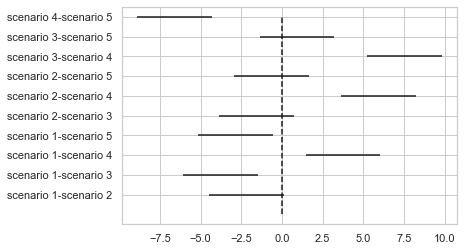

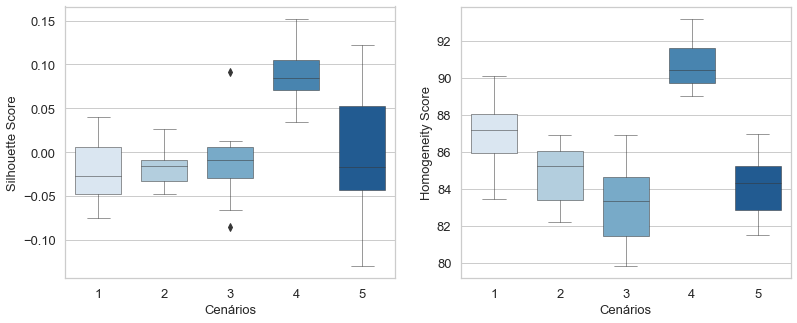

In [59]:
columns = ['1','2','3','4','5']

silhoutte = [
    [-0.050746,0.040182,-0.049548,0.000776,-0.040719,0.019620,-0.075262,0.007149,-0.020345,-0.034465],
    [-0.047417,0.017194,0.026293,-0.008280,-0.016697,-0.008785,-0.034554,-0.027263,-0.014649,-0.045520],
    [0.007158,-0.009886,-0.012530,0.091843,-0.065382,-0.008647,0.012658,-0.034852,-0.084533,0.001868],
    [0.068265,0.151928,0.034439,0.073188,0.126769,0.071420,0.101550,0.071785,0.106460,0.095445],
    [-0.004329,-0.129324,-0.059872,-0.032513,-0.029495,0.122461,0.119426,-0.045925,0.064392,0.019560]
]

homogeneity = [
    [86.83,84.79,88.13,87.72,83.44,87.55,86.81,85.61,88.15,90.12],
       [86.08,85.48,83.19,86.89,82.45,86.20,85.84,84.08,84.99,82.20],
       [83.41,79.83,86.91,85.29,83.85,80.67,82.21,81.23,84.88,83.27],
       [89.72,90.83,89.05,90.33,92.38,89.03,90.48,91.91,89.79,93.19],
       [84.26,86.95,85.61,82.92,81.89,82.83,85.15,81.53,84.35,85.24],
]

stats_test(silhoutte[0],silhoutte[1],silhoutte[2],silhoutte[3],silhoutte[4])
stats_test(homogeneity[0],homogeneity[1],homogeneity[2],homogeneity[3],homogeneity[4])

fig, axs = plt.subplots(ncols=2, figsize=(13,5))
sns.set_style("whitegrid")

ax = sns.boxplot(data=silhoutte, palette='Blues', ax=axs[0], width=.7, linewidth = 0.5)
ax.set_xlabel("Cenários",fontsize=fontsize_xylabel)
ax.set_ylabel("Silhouette Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
a = ax.set_xticklabels(columns, rotation=0)

ax = sns.boxplot(data=homogeneity, palette='Blues', ax=axs[1],  width=.7, linewidth = 0.5)
ax.set_xlabel("Cenários",fontsize=fontsize_xylabel)
ax.set_ylabel("Homogeneity Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
_ = ax.set_xticklabels(columns, rotation=0)

fig = ax.get_figure()
fig.savefig("6_cluster_mini_batch_kmeans_silhouette_homogeneity_boxplot.pdf", bbox_inches='tight')

## Summary Clusters

All: ShapiroResult(statistic=0.7396705746650696, pvalue=0.00012381051783449948)
p-value 0.7762027978897095
p-value 0.5191555619239807
p-value 0.7681390047073364
p-value 0.02427065186202526
KruskalResult(statistic=17.582857142857137, pvalue=0.0005361519491862146)
F_onewayResult(statistic=14.033928244433493, pvalue=9.593087917543421e-05)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
scenario 1 scenario 2   -0.219 0.0072 -0.3825 -0.0554   True
scenario 1 scenario 3  -0.3159  0.001 -0.4794 -0.1523   True
scenario 1 scenario 4  -0.3262  0.001 -0.4898 -0.1627   True
scenario 2 scenario 3  -0.0969 0.3585 -0.2605  0.0666  False
scenario 2 scenario 4  -0.1072 0.2768 -0.2708  0.0563  False
scenario 3 scenario 4  -0.0103    0.9 -0.1739  0.1532  False
------------------------------------------------------------


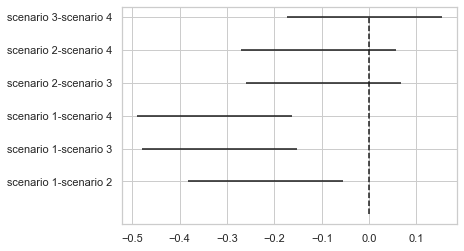

All: ShapiroResult(statistic=0.6012683510780334, pvalue=3.035185045519029e-06)
p-value 0.8572512269020081
p-value 0.0002823805552907288
p-value 0.421149343252182
p-value 0.31404030323028564
KruskalResult(statistic=13.585507246376801, pvalue=0.003527244351686062)
F_onewayResult(statistic=2.03171845847005, pvalue=0.14998372963419396)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
scenario 1 scenario 2  -0.0022    0.9 -0.0313 0.0269  False
scenario 1 scenario 3   -0.019 0.2807 -0.0481 0.0101  False
scenario 1 scenario 4  -0.0186 0.2974 -0.0477 0.0105  False
scenario 2 scenario 3  -0.0168 0.3812 -0.0459 0.0123  False
scenario 2 scenario 4  -0.0164 0.4016 -0.0455 0.0127  False
scenario 3 scenario 4   0.0004    0.9 -0.0287 0.0295  False
-----------------------------------------------------------


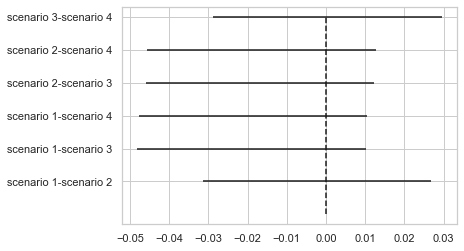

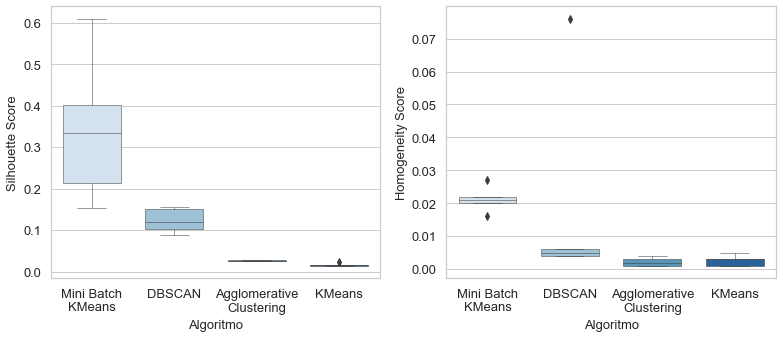

In [62]:
columns = ['Mini Batch\nKMeans','DBSCAN','Agglomerative\nClustering','KMeans']

silhoutte = [
    [0.3332151389,0.2147631438,0.4014094579,0.1529548591,0.6097468438],
    [0.1550161664,0.08805541675,0.1506658518,0.1203283912,0.1031565503],
    [0.02592067852,0.02503412297,0.02631608788,0.02751099225,0.02791180728],
    [0.01522902286,0.01372129121,0.01355754226,0.02303340803,0.01552438573]
]

homogeneity = [
    [0.022,0.020,0.027,0.016,0.021],
      [0.004,0.076,0.004,0.005,0.006],
      [0.001,0.002,0.004,0.001,0.003],
      [0.003,0.001,0.005,0.001,0.003],
]

stats_test(silhoutte[0],silhoutte[1],silhoutte[2],silhoutte[3])
stats_test(homogeneity[0],homogeneity[1],homogeneity[2],homogeneity[3])

fig, axs = plt.subplots(ncols=2, figsize=(13,5))
sns.set_style("whitegrid")

ax = sns.boxplot(data=silhoutte, palette='Blues', ax=axs[0], width=.7, linewidth = 0.5)
ax.set_xlabel("Algoritmo",fontsize=fontsize_xylabel)
ax.set_ylabel("Silhouette Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
a = ax.set_xticklabels(columns, rotation=0)

ax = sns.boxplot(data=homogeneity, palette='Blues', ax=axs[1],  width=.7, linewidth = 0.5)
ax.set_xlabel("Algoritmo",fontsize=fontsize_xylabel)
ax.set_ylabel("Homogeneity Score",fontsize=fontsize_xylabel)
ax.tick_params(labelsize=fontsize_tick)
_ = ax.set_xticklabels(columns, rotation=0)

fig = ax.get_figure()
fig.savefig("6_cluster_summary_silhouette_homogeneity_boxplot.pdf", bbox_inches='tight')